In [1]:
import control as ct
from control.matlab import *

In [8]:
P = zpk([], [-0.1, -20, -20], 8000); num, den=zpk2tf([], [-0.1, -20, -20], 8000); P2 = tf(num, den)

In [9]:
print(P2)

<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           8000
---------------------------
s^3 + 40.1 s^2 + 404 s + 40



In [3]:
print(P)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           8000
---------------------------
s^3 + 40.1 s^2 + 404 s + 40



In [4]:
import matplotlib.pyplot as plt

In [10]:
y, T = step(P2)


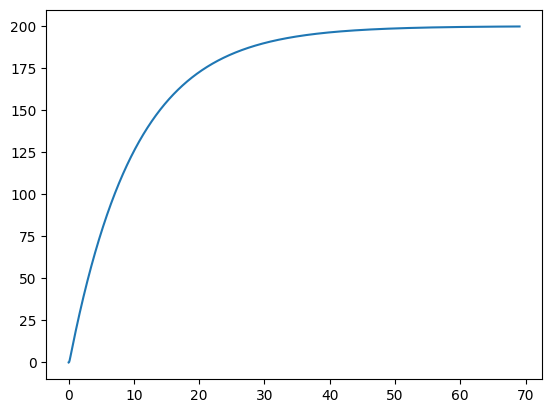

In [12]:
plt.plot( T, y)

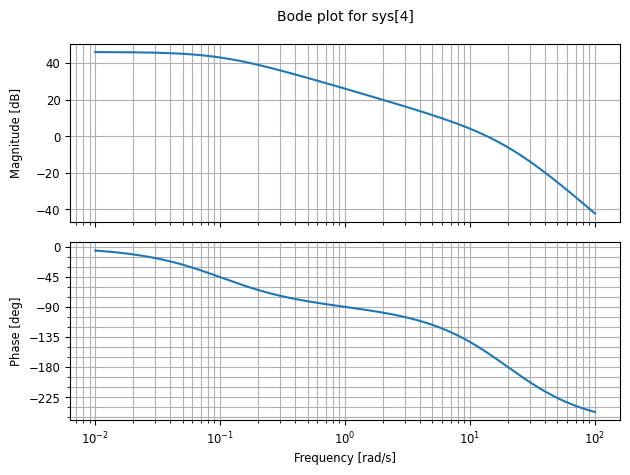

In [13]:
ct.bode(P2)

In [14]:
K1 = ct.tf([10, 1], [20, 0])

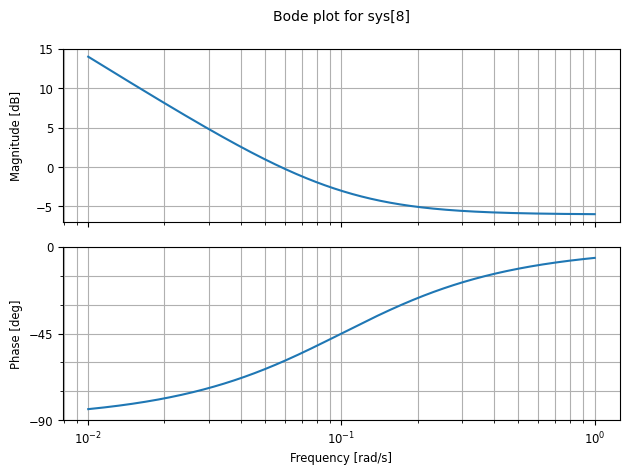

In [15]:
ct.bode(K1)

In [16]:
loop1 = ct.series(K1, P2)

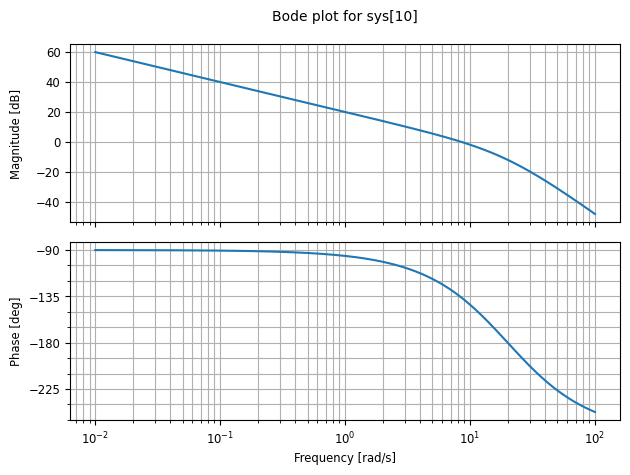

In [17]:
ct.bode(loop1)

In [43]:
clsd1 = ct.feedback(loop1,1,sign=-1, name="clsd1")

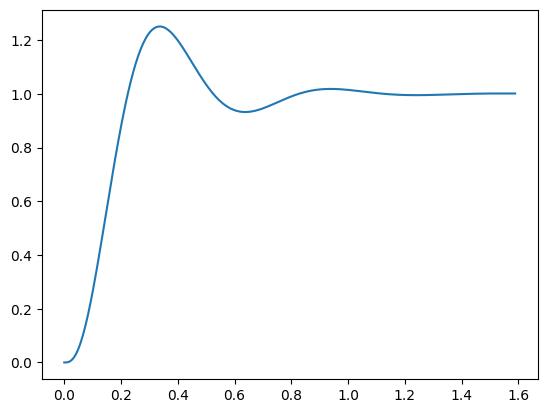

In [19]:
y,T=step(clsd1); plt.plot(T,y)

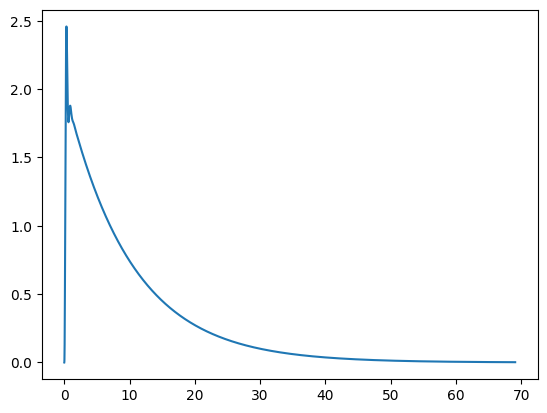

In [45]:
Gyd1 = ct.feedback(P2, K1, name="Gyd1"); y, T = step(Gyd1); plt.plot(T,y)

In [46]:
ct.poles(Gyd1)

array([-31.30395435 +0.j        ,  -4.34802283+10.43427436j,
        -4.34802283-10.43427436j,  -0.1        +0.j        ])

In [24]:
ct.poles(P2)

array([-20. +4.22715683e-07j, -20. -4.22715683e-07j,
        -0.1+0.00000000e+00j])

In [28]:
k2D=ct.tf([0.1, 1], [0.01, 1])

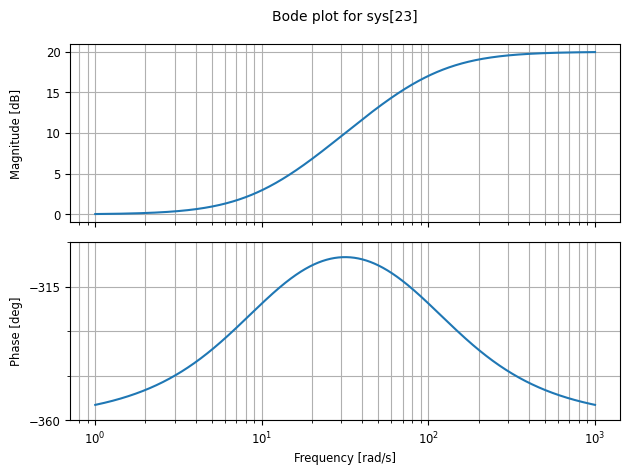

In [31]:
ct.bode(k2D)

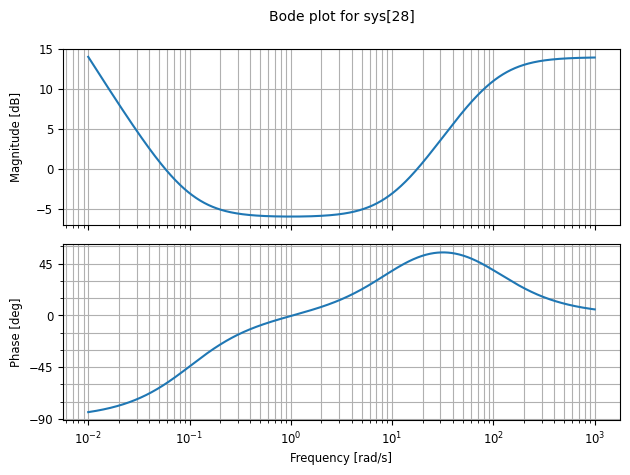

In [34]:
K2 = series(K1, k2D); ct.bode(K2)

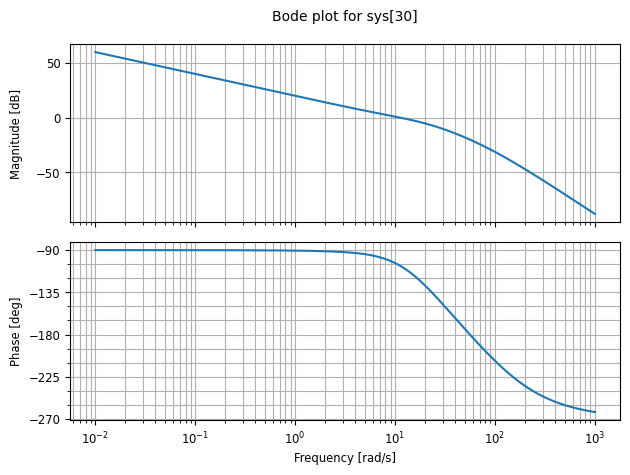

In [35]:
loop2 = series(K2, P2); ct.bode(loop2)

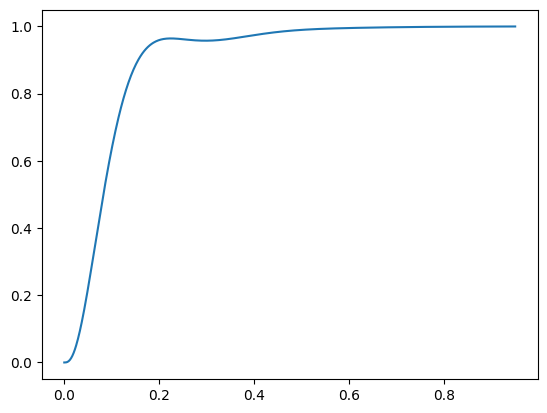

In [42]:
clsd2 = ct.feedback(loop2, 1, name="clsd2"); y, T=step(clsd2); plt.plot(T,y)

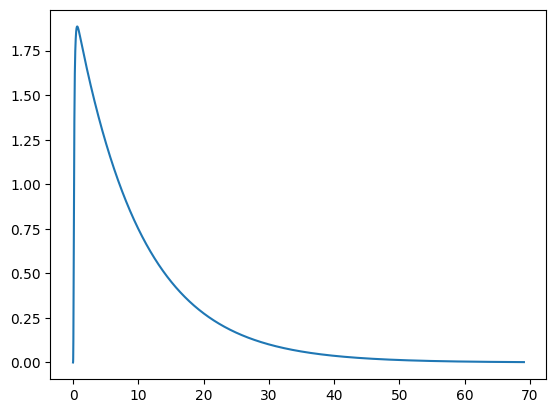

In [47]:
Gyd2 = ct.feedback(P2, K2, name="Gyd2"); y, T = step(Gyd2); plt.plot(T,y)

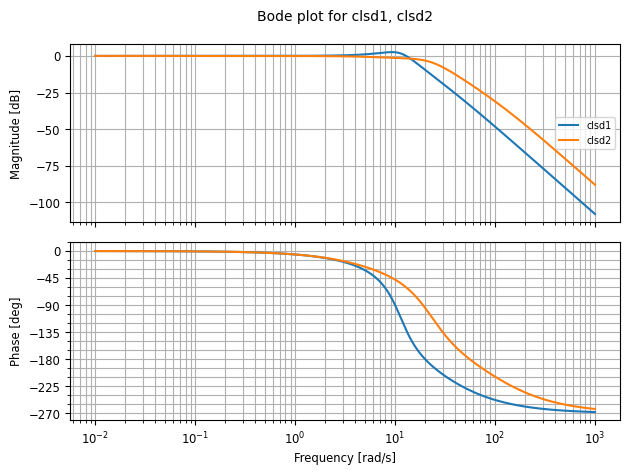

In [44]:
resp=ct.frequency_response([clsd1, clsd2]); ct.bode_plot(resp)

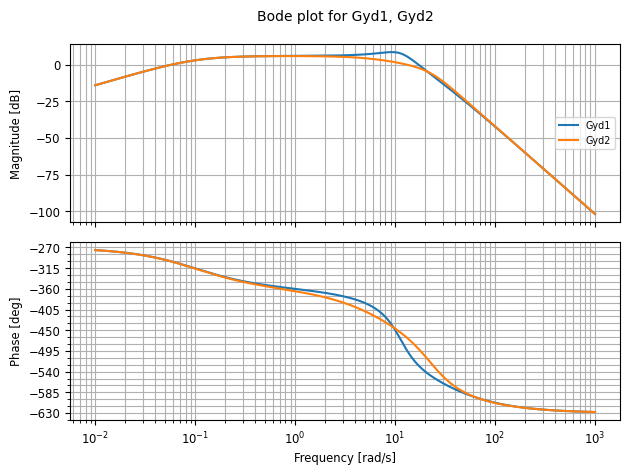

In [48]:
ct.bode([Gyd1, Gyd2])

In [51]:
S1 = ct.feedback(1, loop1, name="S1"); S2 = ct.feedback(1, loop2, name="S2")

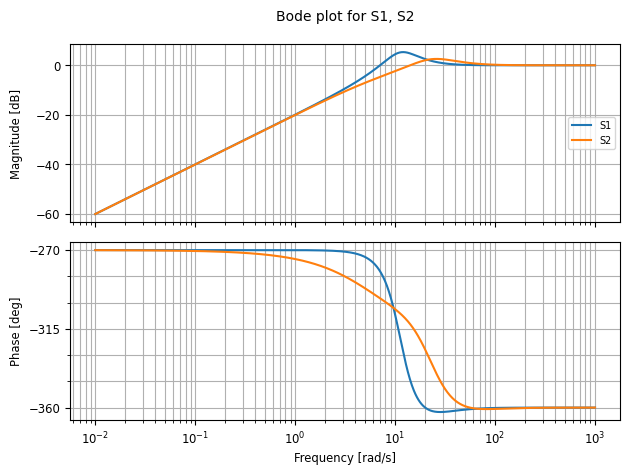

In [52]:
ct.bode([S1, S2])

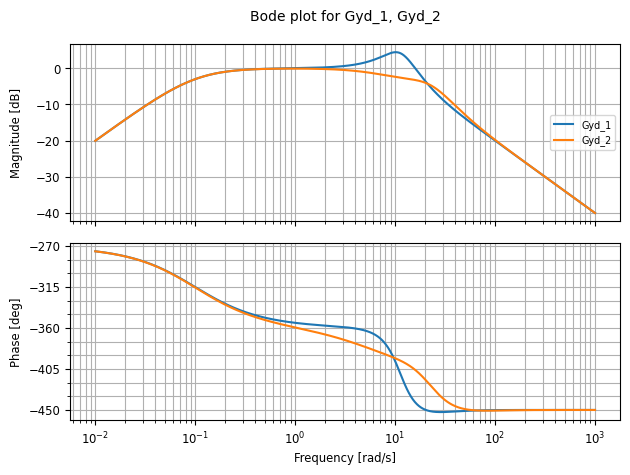

In [54]:
Gd=ct.tf([100], [10, 1], name="Gd"); Gyd_1 = ct.series(S1, Gd, name="Gyd_1"); Gyd_2 = ct.series(S2, Gd, name="Gyd_2"); ct.bode([Gyd_1, Gyd_2])

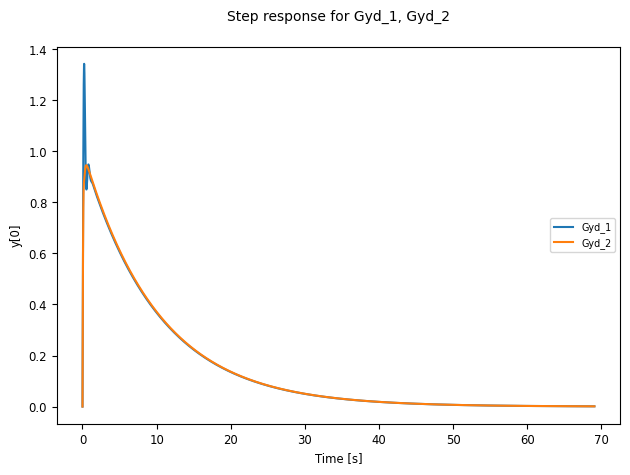

In [56]:
ct.step_response([Gyd_1, Gyd_2]).plot()

In [67]:
K3 = ct.tf([0.5], [1], name = "K3"); K4 = ct.tf([0.5, 1], [1, 0], name= "K4"); K5 = ct.series(K4, ct.tf([0.05, 1], [0.005, 1]), name="K5") 

In [76]:
loop3 = ct.series(K3, P2, name="loop3"); loop4 = ct.series(K4, P2, name="loop4"); loop5 = ct.series (K5, P2, name="loop5")

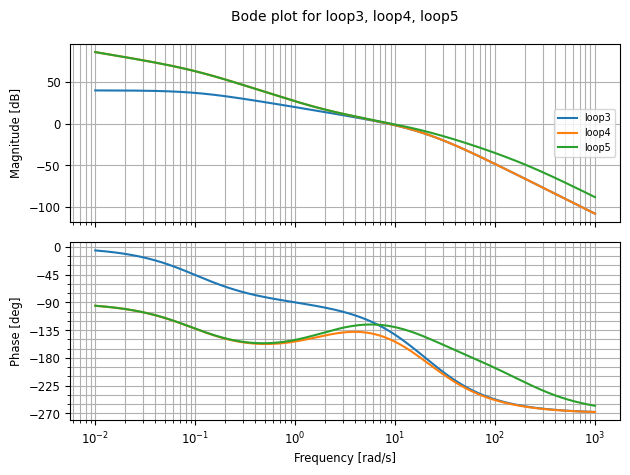

In [77]:
ct.bode([loop3, loop4, loop5])

In [71]:
S3 = ct.feedback(1, loop3, name="S3"); S4 = ct.feedback(1, loop4, name="S4"); S5 = ct.feedback(1, loop5, name="S5") 

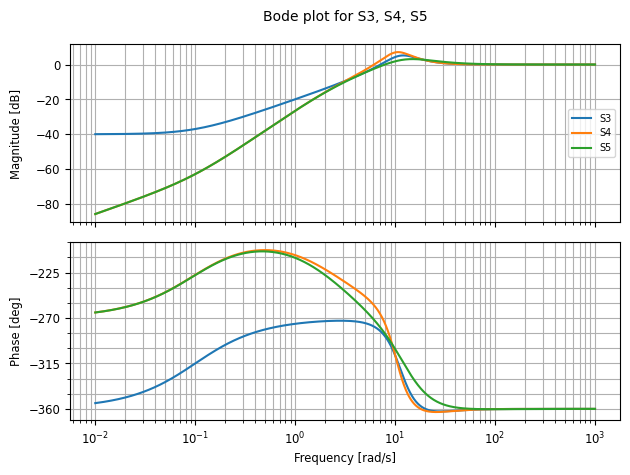

In [72]:
ct.bode([S3, S4, S5])

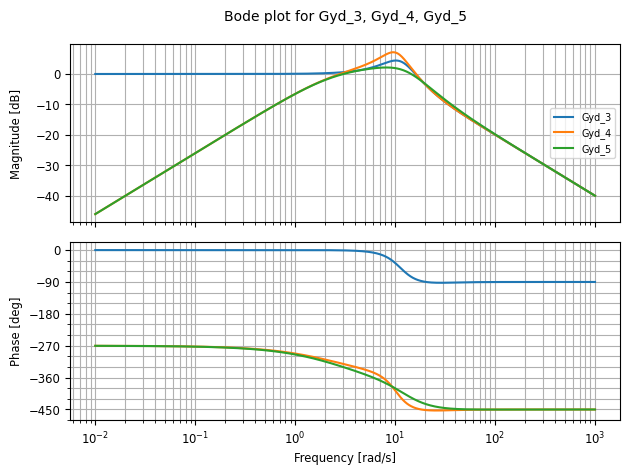

In [73]:
Gyd_3 = ct.series(S3, Gd, name="Gyd_3"); Gyd_4 = ct.series(S4, Gd, name="Gyd_4"); Gyd_5 = ct.series(S5, Gd, name="Gyd_5"); ct.bode([Gyd_3, Gyd_4, Gyd_5]); 

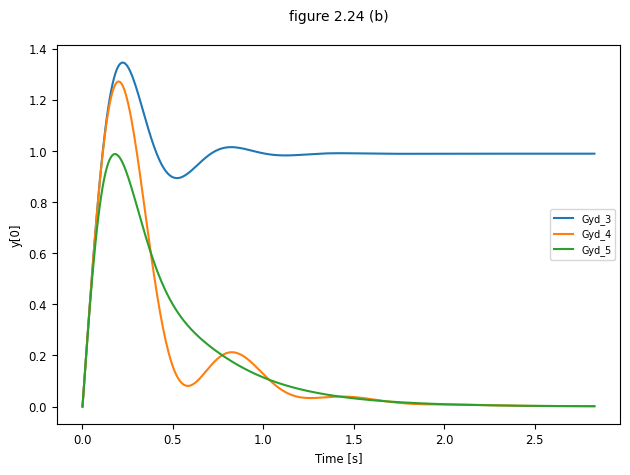

In [75]:
ct.step_response([ Gyd_3, Gyd_4, Gyd_5]).plot(title="figure 2.24 (b)")

In [65]:
print(K4)

<TransferFunction>: K4
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.5 s + 1
---------
    s



In [66]:
print(K5)

<TransferFunction>: K5
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.025 s^2 + 0.55 s + 1
----------------------
    0.005 s^2 + s



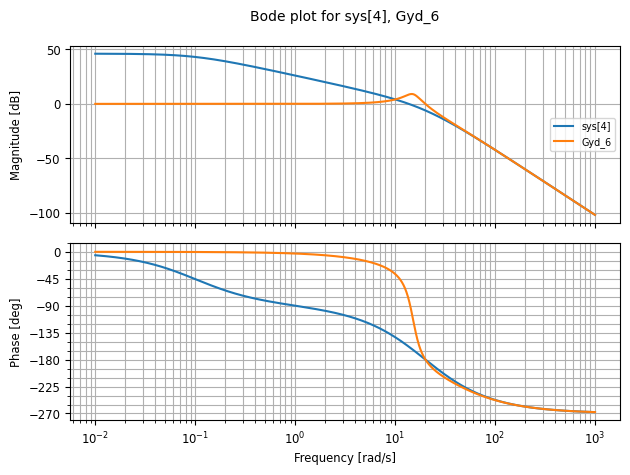

In [79]:
Gyd_6 = ct.feedback(P2, 1, sign=-1, name="Gyd_6"); ct.bode([P2, Gyd_6])

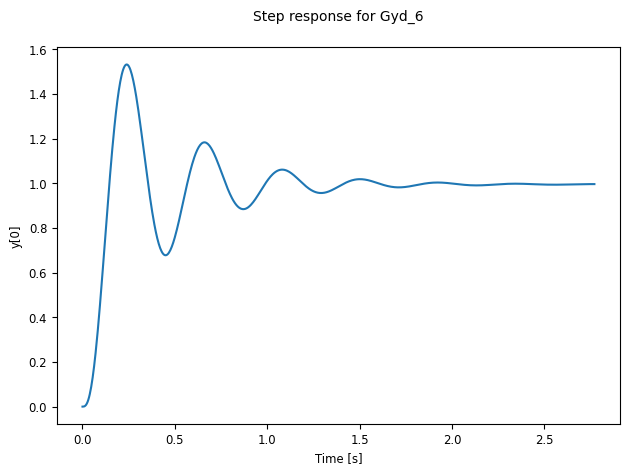

In [82]:
ct.step_response([ Gyd_6]).plot()

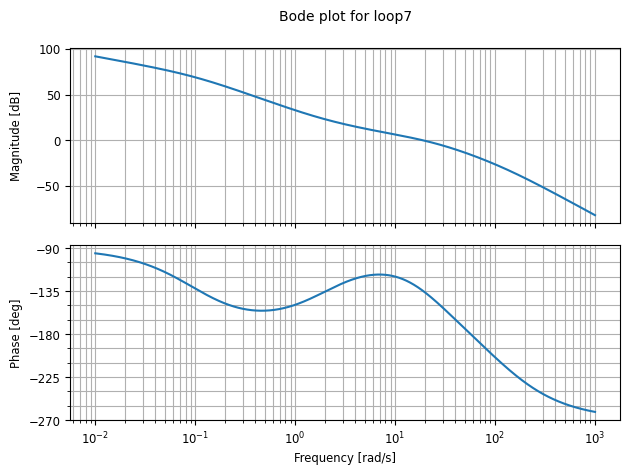

In [107]:
K7 = ct.series(ct.tf([1, 2], [1, 0]), ct.tf([0.08, 1], [0.008, 1]), name="K7"); loop7=ct.series(K7, P2, name="loop7"); ct.bode(loop7)

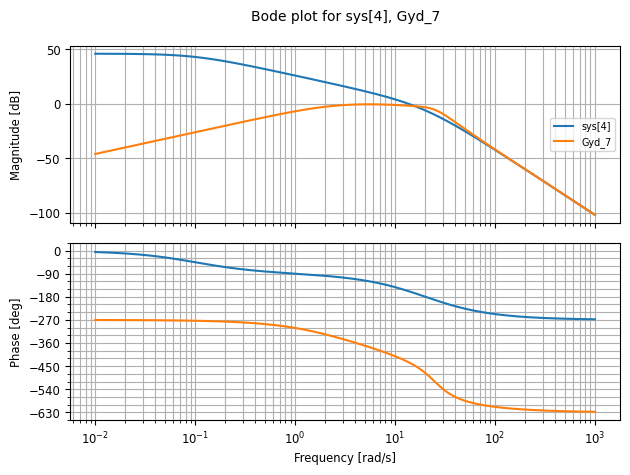

In [108]:
Gyd_7 = ct.feedback(P2, K7, sign=-1, name="Gyd_7"); ct.bode([P2, Gyd_7])

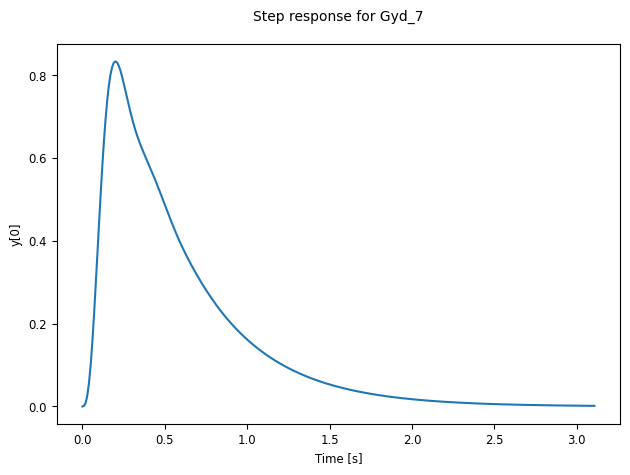

In [109]:
ct.step_response(Gyd_7).plot()